# Exploratory Data Analysis - Retail
### TASK : To Perform ‘Exploratory Data Analysis’ on dataset 'SampleSuperstore'

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Data Upload and Reading Process

df = pd.read_csv('SampleSuperstore.csv')

df.head(7)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656


In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## Data Cleaning Process

In [6]:
df = df.drop(['Country'], axis = 1)
df.head(7)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656


## Data Analysis

# Discount vs Profit Analysis

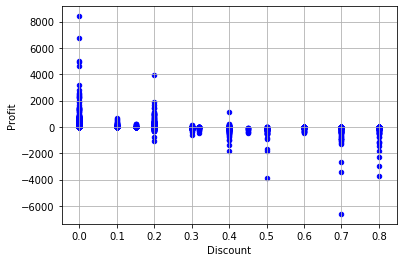

In [49]:

df.plot.scatter(x = 'Discount', y = 'Profit', color = 'blue',grid = True)


### Result from graph:
#### Less is discount or limit approching to 0.0 has more tendancy to secure a profit edge.

# Sales vs Category Analysis

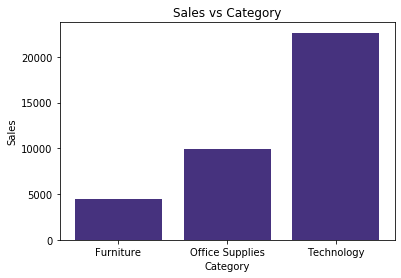

In [52]:

plt.bar('Category' ,'Sales' ,data = df)
plt.title('Sales vs Category')
plt.xlabel('Category')
plt.ylabel('Sales')

plt.show()

### Result from graph:
#### Technology category have great sales record with more than 20,000 figure on sales column.

# Shipping Mode Analysis

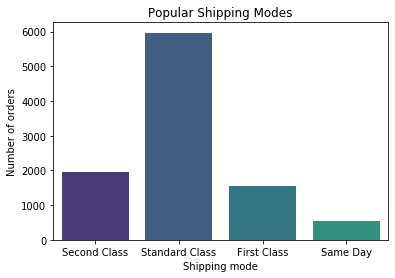

In [54]:
sns.countplot('Ship Mode', data = df)

plt.title('Popular Shipping Modes')
plt.xlabel('Shipping mode')
plt.ylabel('Number of orders')
plt.xticks()

plt.show()

### Result from Graph:
#### More people choose to prefer Standard Class in shipping mode.

# Quantities Analysis with respect to Segment(Consumer, Corporate, Home Office)

In [57]:
df_group = df.groupby('Segment')['Quantity'].sum().reset_index()

print(df_group)

       Segment  Quantity
0     Consumer     19521
1    Corporate     11608
2  Home Office      6744


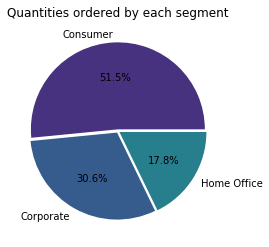

In [58]:

labels = df['Segment'].unique()

plt.pie(df_group['Quantity'],autopct = '%1.1f%%', labels = labels, explode = (0.02,0.02,0.02))
plt.title('Quantities ordered by each segment')

plt.show()

### Result from Pie Chart:
#### Consumer have secured half the chart with more quantities are orderded by them.

# Profit Analysis with respect to Segment(Consumer, Corporate, Home Office)

In [62]:
df_group = df.groupby('Segment')['Profit'].sum().reset_index()

print(df_group)

       Segment       Profit
0     Consumer  134119.2092
1    Corporate   91979.1340
2  Home Office   60298.6785


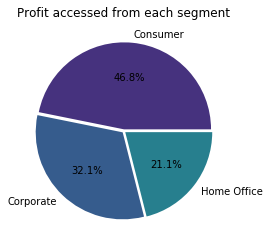

In [60]:
labels = df['Segment'].unique()

plt.pie(df_group['Profit'],autopct = '%1.1f%%', labels = labels, explode = (0.02,0.02,0.02))
plt.title('Profit accessed from each segment')

plt.show()

### Result from Pie Chart:
#### Consumer still have great record for profit making .

# Segment with shipping prefrence Analysis

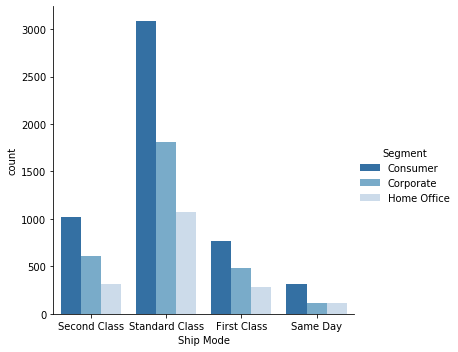

In [24]:
sns.catplot('Ship Mode', data = df, hue = 'Segment', kind = 'count', palette = 'Blues_r')

plt.show()

# State Sales Analysis

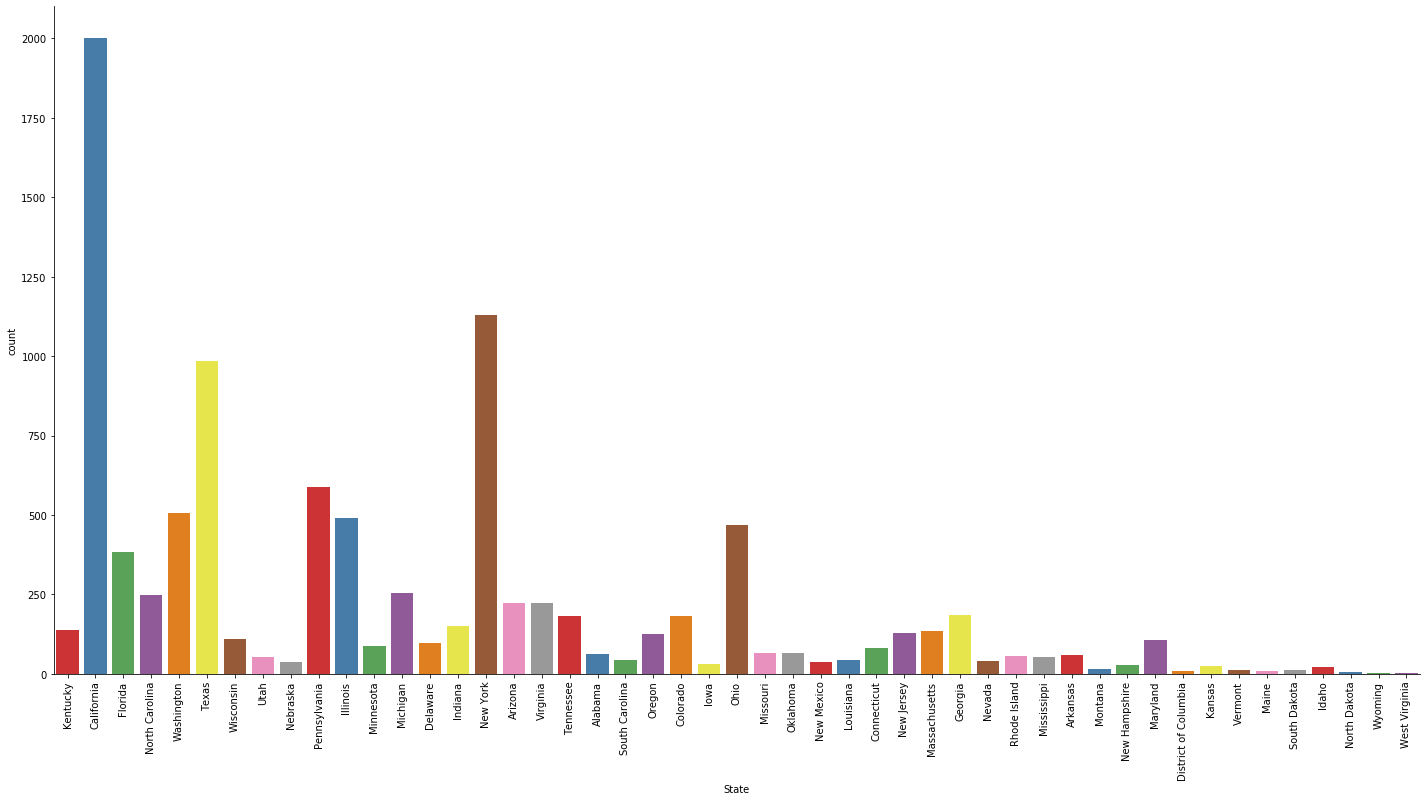

In [65]:
sns.catplot('State',kind = 'count',data = df ,palette ='Set1' ,height = 10, aspect =2)
plt.xticks(rotation = 90)

plt.show()

In [72]:
df_most10_state = df.groupby('State')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending = False)

df_most10_state.reset_index(drop = True, inplace = True)

df_most10_state = df_most10_state.head(10)

df_most10_state

,State,Profit
0,California,76381.3871
1,New York,74038.5486
2,Washington,33402.6517
3,Michigan,24463.1876
4,Virginia,18597.9504
5,Indiana,18382.9363
6,Georgia,16250.0433
7,Kentucky,11199.6966
8,Minnesota,10823.1874
9,Delaware,9977.3748


### Result From Graph:
#### Calfornia and New York have great profit figures.

# Region vs Quantity Analysis

    Region  Quantity
0  Central      8780
1     East     10618
2    South      6209
3     West     12266


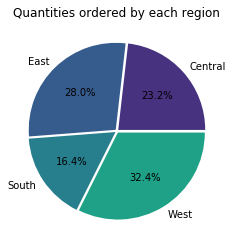

In [35]:
df_region = df.groupby('Region')['Quantity'].sum().reset_index()
print(df_region)

labels = df_region['Region'].unique()

plt.pie(df_region['Quantity'],autopct = '%1.1f%%', labels = labels, explode = (0.02,0.02,0.02,0.02))
plt.title('Quantities ordered by each region')

plt.show()

### Result from Pie Chart:
#### West, East, Central have great quantity figures.

# Category vs Quantity Analysis

          Category  Quantity
0        Furniture      8028
1  Office Supplies     22906
2       Technology      6939


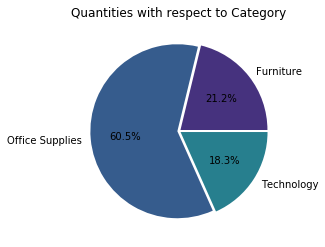

In [70]:
df_most = df.groupby('Category')['Quantity'].sum().reset_index()
print(df_most)

labels = df_most['Category'].unique()

plt.pie(df_most['Quantity'],autopct = '%1.1f%%', labels = labels, explode = (0.02,0.02,0.02))
plt.title('Quantities with respect to Category')

plt.show()

### Result from Pie Chart:
#### Office Supply have great coverage  in quantity sales. 

# Sub-Category vs Profit Analysis

In [38]:
df_most10 = df.groupby('Sub-Category')['Profit'].median().reset_index().sort_values(by = 'Profit', ascending = False)

df_most10.reset_index(drop = True, inplace = True)

df_most10 = df_most10.head(10)

df_most10

,Sub-Category,Profit
0,Copiers,332.99420
1,Machines,38.99740
2,Phones,23.52480
3,Accessories,21.00000
4,Appliances,17.44650
5,Chairs,13.31760
6,Envelopes,12.71835
7,Paper,11.54320
8,Furnishings,9.10200
9,Storage,7.75700


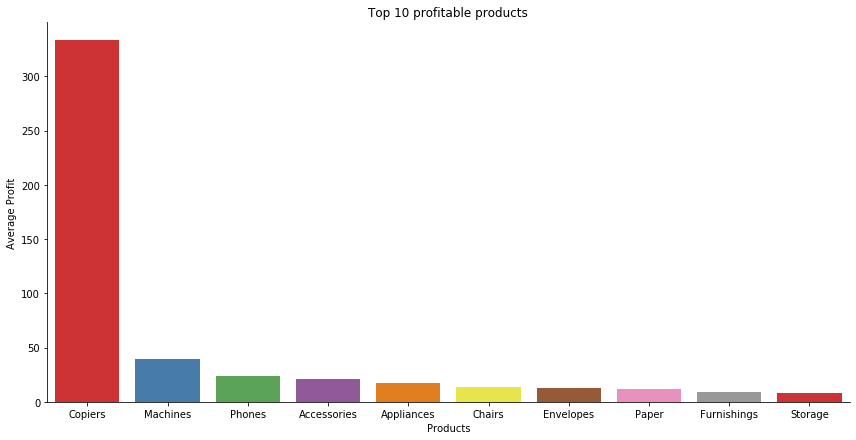

In [47]:
sns.catplot('Sub-Category', 'Profit', data = df_most10, kind = 'bar', palette ='Set1' ,height = 6, aspect = 2)

plt.title('Top 10 profitable products')
plt.xticks()
plt.yticks()
plt.xlabel('Products')
plt.ylabel('Average Profit')

plt.show()

# Weak Areas To work:

## 1.  Furniture is not selling well.
## 2.  People lacking interest in Same Day, First class Shipping Mode.
## 3.  Focus on Home office, they are lacking sales figures and profit too.
## 4.  Texas and many southern state should be in prime focus.